# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory ID below

In [2]:
print(2514391)

2514391


<font size = "5">

Import the "pandas" and "matplotlib.pyplot" library

In [3]:
# Write your answer here:
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

(a) Compute function for each individual (map)

<font size = "3">

- Import the datset "data/bmi.csv"
    - **Note that the column `Height` is in $cm$, and `Weight` is in $kg$**
- Write a lambda function for $ BMI = \frac{weight (kg)}{height (m)^2} $
- Use ```list(map(...))``` to calculate $BMI$ for each row of the dataset
- Round the outcome into 2 decimal points
- Store the calculation in a new column in the dataframe called `BMI`
- Display the dataframe


In [4]:
# Write your own code here

data = pd.read_csv("data/bmi.csv")
bmi_calculator = lambda row: round(row["Weight"] / ((row["Height"] / 100) ** 2), 2)
data["BMI"] = list(map(bmi_calculator, data.to_dict(orient = "records")))
print(data)

     Gender  Height  Weight  Index    BMI
0      Male     174      96      4  31.71
1      Male     189      87      2  24.36
2    Female     185     110      4  32.14
3    Female     195     104      3  27.35
4      Male     149      61      3  27.48
..      ...     ...     ...    ...    ...
495  Female     150     153      5  68.00
496  Female     184     121      4  35.74
497  Female     141     136      5  68.41
498    Male     150      95      5  42.22
499    Male     173     131      5  43.77

[500 rows x 5 columns]


<font size = "5">
For questions (b)-(d), read "data/wdi_2020.csv" <br>

- This is a dataset containing the proportion  <br>
of urban population by country in 2020

<font size = "5">

(b) Convert to upper case

<font size = "3">

- Create the following function to convert a string to upper case

$\quad$ ``` fn_upper = lambda x: x.upper() ```

- Create a new column, "countryname_upper"  <br>
that converts "countryname" to upper case.

- Print the original `countryname` and the newly created column, like: <br>
"['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', ......] "

In [11]:
# Write your own code here
data1 = pd.read_csv("data/wdi_2020.csv")

fn_upper = lambda x: x.upper()

data1["countryname_upper"] = data1["countryname"].apply(fn_upper)

print(data1[["countryname", "countryname_upper"]])

                     countryname            countryname_upper
0                    Afghanistan                  AFGHANISTAN
1    Africa Eastern and Southern  AFRICA EASTERN AND SOUTHERN
2     Africa Western and Central   AFRICA WESTERN AND CENTRAL
3                        Albania                      ALBANIA
4                        Algeria                      ALGERIA
..                           ...                          ...
261           West Bank and Gaza           WEST BANK AND GAZA
262                        World                        WORLD
263                  Yemen, Rep.                  YEMEN, REP.
264                       Zambia                       ZAMBIA
265                     Zimbabwe                     ZIMBABWE

[266 rows x 2 columns]


<font size = "5">

(c) Extract sorted elements from a dataset

<font size = "3">

- Sort by "prop_urbanpopulation" in ascending order
- Subset the 5 countries with the lowest urban population

In [10]:
# Write your code here


<font size = "5">

(d) Subset elements with query

<font size = "3">

- Compute the 25 quantile value of "prop_urbanpopulation"
- Use ".query()" to subset countries with <br>
 "prop_urbanpopulation" higher the 25 quantile

**hint: Import ```numpy``` and use `np.nanpercentile`**

In [13]:
# Write your own code here
import numpy as np

quantile_25 = np.nanpercentile(data1["prop_urbanpopulation"], 25)
higher_subset = data1.query("prop_urbanpopulation > @quantile_25")

print(higher_subset)

     year yearcode                 countryname countrycode  \
2    2020   YR2020  Africa Western and Central         AFW   
3    2020   YR2020                     Albania         ALB   
4    2020   YR2020                     Algeria         DZA   
5    2020   YR2020              American Samoa         ASM   
6    2020   YR2020                     Andorra         AND   
..    ...      ...                         ...         ...   
258  2020   YR2020               Venezuela, RB         VEN   
260  2020   YR2020       Virgin Islands (U.S.)         VIR   
261  2020   YR2020          West Bank and Gaza         PSE   
262  2020   YR2020                       World         WLD   
264  2020   YR2020                      Zambia         ZMB   

     prop_urbanpopulation           countryname_upper  
2               47.857831  AFRICA WESTERN AND CENTRAL  
3               62.112000                     ALBANIA  
4               73.733000                     ALGERIA  
5               87.153000      

<font size = "5">

(e) Plot by category

<font size = "3">

- Read "data/wdi_urban.csv"<br>
This contains data from 1980 and 2020

- Create a list with the unique values of "year"
- Create a plot with a ...
    - Histogram of "prop_urbanpopulation" <br>
    for each year
    - Set the histogram option ``` alpha = 0.5 ``` for transparency
    - All the histograms should be overlapping
    - Create a legend with the list of years
    - Label the axes and the title

What do we learn from the graph?

HINT: See the example at the end of Lecture 10


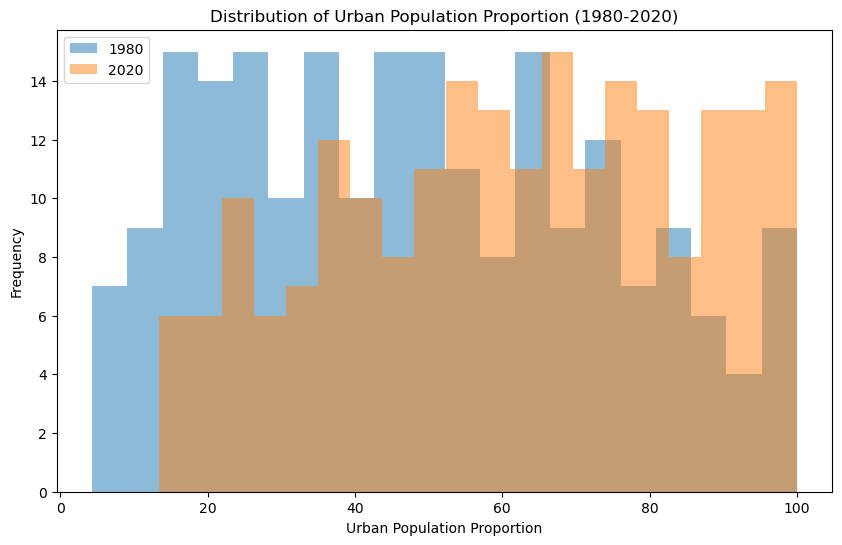

In [15]:
# Write your own code here

data2 = pd.read_csv("data/wdi_urban.csv")

years = data2["year"].unique()

plt.figure(figsize = (10,6))
for year in years:
    year_data2 = data2[data2["year"] == year]
    plt.hist(year_data2["prop_urbanpopulation"], alpha = 0.5, label = str(year), bins = 20)

plt.legend()
plt.xlabel("Urban Population Proportion")
plt.ylabel("Frequency")
plt.title("Distribution of Urban Population Proportion (1980-2020)")

plt.show()